# Module 3 DBSCAN Practice


Finds core samples of high density and expands clusters from them.

In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

Generate sample data

**make_blobs(): ** Generates isotropic Gaussian blobs for clustering. 

**centers:**  parameter is used to specify number of centers to generate. It takes input in the form of either "int or array of shape [n_centers, n_features]". 

**cluster_std :** The standard deviation of the clusters.

**random_state :** int, RandomState instance or None, optional (default=None)
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

In [39]:
# centers of clusters
centers = [[1, 1], [-1, -1], [1, -1]]

# Create blobs with 3 different centers
Data, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
print(Data[1:10])

[[-1.15474834 -1.2041171 ]
 [ 0.67863613  0.72418009]
 [ 0.45078298 -1.4270968 ]
 [ 1.49211627  1.48095194]
 [-0.98194639 -0.06415008]
 [-1.02343462 -1.12701724]
 [ 0.93511262 -0.69222793]
 [ 1.45065437  0.5680274 ]
 [ 1.37976832  1.0350205 ]]


So the function make_blobs() generated samples 75. samples of data. Data has the x,y coordicates of blobs created and labels_true has the labels to which center the blob belongs to. Below function "StandardScaler().fit_transform(X)" standardizes Data by converting them to zero mean and scaling to unit variance. 

**Activity 1: ** Use the StandardScalar() function to normalize Data.

In [40]:
# Your answer for activity 1 goes here...

Data = StandardScaler().fit_transform(Data)
Data[1:10]

array([[-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       [ 0.11900101, -1.05397553],
       [ 1.1224246 ,  1.77493654],
       [-1.2615699 ,  0.27188135],
       [-1.30154775, -0.76206203],
       [ 0.58569865, -0.33910463],
       [ 1.08247212,  0.8868554 ],
       [ 1.01416668,  1.34114022]])

### Compute DBSCAN

**Activity 2: ** Run the DBSCAN algorithm on Data to construct a DBSCAN object that requires a minimum of 10 data points in a neighborhood of radius 0.3 to be considered a core point.

In [41]:
# Your answer for activity 2 goes here...

db = DBSCAN(eps=0.3, min_samples=10).fit(Data)
db

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    min_samples=10, p=None, random_state=None)

In [42]:
print(db.labels_[1:20])
labels_true[1:20]

[ 1  0  2  0  1  1  2  0  0  1  1  1  2  1  0 -1  1  1  2]


array([1, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2])

If you look at the labels returned by dbscan, they are almost same as the labels returned by make_blobs(). There are some -1's apart from {0,1,2}. The -1's represent samples/blobs which couldn't be included in any of the clusters. You can call them outliers in this context but they really are not outliers. They just didnt fit the criteria the algorithm is using to cluster the points. 

Lets generate a vector equal to size of number of labels and filled with boolean values. np.zeros_like() will create a zeros vector but we specified data type as boolean. Since zeros represent False, the vector is populated with False values. 

**Referenec: ** [numpy.zeros_like()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html)

In [43]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[1:10]

array([False, False, False, False, False, False, False, False, False], dtype=bool)

Below displayed is the list of samples indices which were formed into clusteres. Notice that index 5 is missing in the first 10 samples indicating sample 5 was not fitted into any cluster.

In [44]:
db.core_sample_indices_[1:20]

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 15, 17, 19, 20, 21,
       22, 23], dtype=int64)

**Activity 3: ** Assign "True" to the indexes in core_samples_mask list for the samples where dbscan was able to cluster the points. 

In [45]:
# Your answer for activity 3 goes here...

core_samples_mask[db.core_sample_indices_] = True
core_samples_mask[1:10]

array([ True,  True,  True,  True, False,  True,  True,  True,  True], dtype=bool)

So DBScan was able to label the samples with one of the 4 values {-1, 0, 1, 2}. The values {0, 1, 2 } are labels for valid clusters formed. Below piece of code is reducing the number of clusters by 1 if there are any -1 labels in the list. That will give the actual count of number of clusters formed.

In [46]:
labels = db.labels_

In [47]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [48]:
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 3


In [49]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))

Homogeneity: 0.953


**Reference: ** [metrics.homogeneity_score()](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html)

Homogeneity metric of a cluster labeling given a ground truth. This function will check accuracy of the predictions. The first argument is the true labels which are stored in the list labels_true. labels_true was returned by make_blobs() function while producing the samples. Its the ground truth. The second parameter is the predictions which are stored in the list labels. The function will cross check the labels in both lists to give the accuracy of predictions. 

In [50]:
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))

Completeness: 0.883


**Reference: ** [sklearn.metrics.completeness_score(labels_true, labels_pred)](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html)

A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster. Both homogeneity and completeness scores have positive values between 0.0 and 1.0, larger values being desirable.

In [51]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(Data, labels))

Silhouette Coefficient: 0.626


From wiki, The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette values range from -1 to 1, where a high value (i'e closer to 1) indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

**Reference: ** [Python documentation for silhoutte](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

In the cell below, first we are assigning unique values {-1, 0, 1, 2} to variable unique_labels. Then using [matplotlib colormap](http://matplotlib.org/api/cm_api.html) module we are generating different colors scheme for each unique label. Spectral is a kind of color map. It is used where the data has a critical middle value. The map consists of two colours with changes in lightness and saturation.

In [52]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

**Reference: **
- [Color maps in Matplotlib](http://www.futurile.net/2016/03/31/colormaps-in-matplotlib/)
- [Color maps reference](http://matplotlib.org/examples/color/colormaps_reference.html)
- [Setting the color of a matplotlib plot](http://chrisalbon.com/python/set_the_color_of_a_matplotlib.html)

------

**zip():** This function takes two equal-length collections, and merges them together in pairs. 

**Activity 4: ** Use this on unique_labels and colors below to zip them and assign the result to indexes variable. 

In [53]:
indexes= zip(unique_labels, colors)
list(indexes)

[(0, array([ 0.61960787,  0.00392157,  0.25882354,  1.        ])),
 (1, array([ 0.99346405,  0.74771243,  0.43529413,  1.        ])),
 (2, array([ 0.74771243,  0.89803922,  0.627451  ,  1.        ])),
 (-1, array([ 0.36862746,  0.30980393,  0.63529414,  1.        ]))]

The forloop is iterating 4 times in below piece of code. We know samples are labelled as -1 if DBscan could not label them. In each iteration, if the sample label is equal to -1, then it is assigned the color code 'k' which represents black. A new array "class_member_mask" is created to store the indexes with True/False values. If the label value matches k(-1 or 0 or 1 or 2 ) then class_member_mask will have True otherwise False. 

In first iteration, match is an array which has indexes of samples where label is equal to 0 in both class_member_mask and core_samples_mask. nomatch will have indexes of samples where label is equal to 0 in class_member_mask but its not equal to 0 in core_samples_mask. The values in match array are plotted on the map using one a color and values in nomatch are plotted in black color. This repeats for 4 iterations  

C:\Users\saikr\Anaconda3\lib\site-packages\matplotlib\lines.py:1107: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:


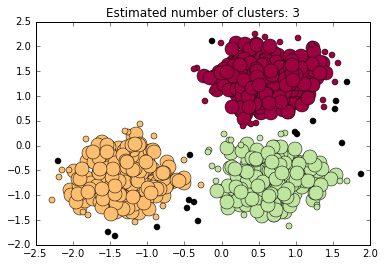

In [55]:
import matplotlib.pyplot as plt

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    match = Data[class_member_mask & core_samples_mask]
    plt.plot(match[:, 0], match[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)

    nomatch = Data[class_member_mask & ~core_samples_mask]
    plt.plot(nomatch[:, 0], nomatch[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()